# Radar de Candles - 21/01/2021

## Martelo invertido


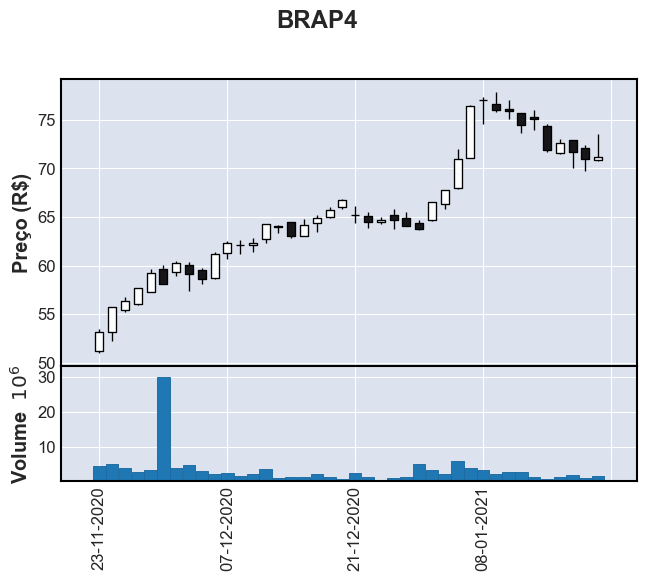

## 


## Harami de fundo e Martelo


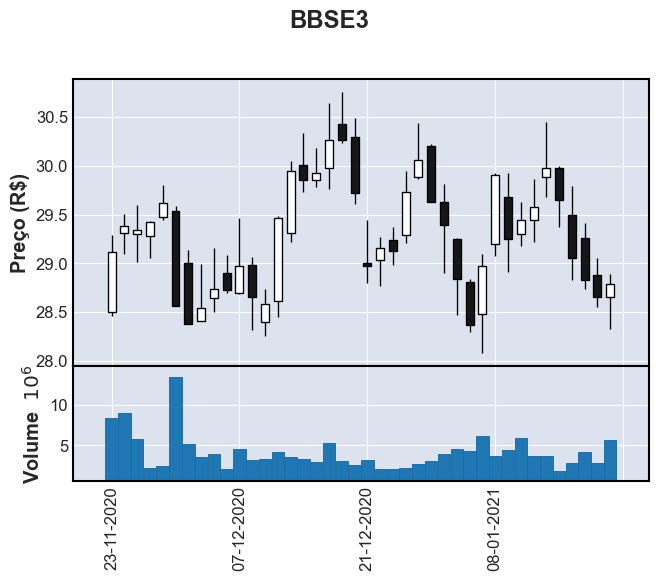

## 


## Harami de fundo e Harami cross


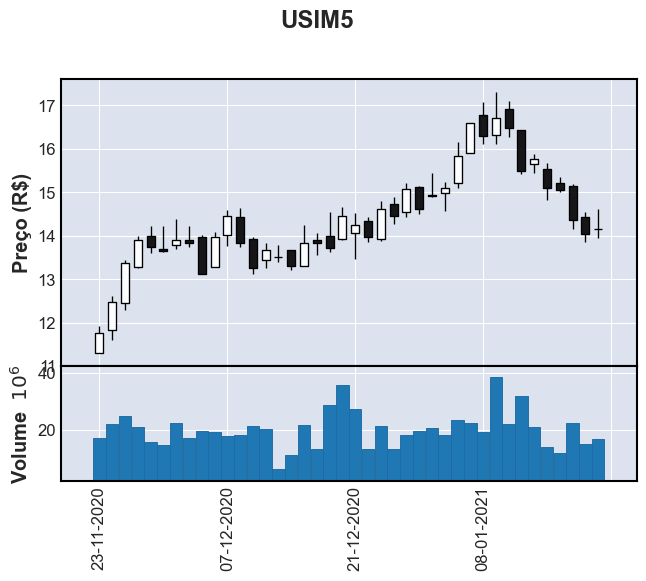

## 


## Harami de fundo e Dragonfly doji


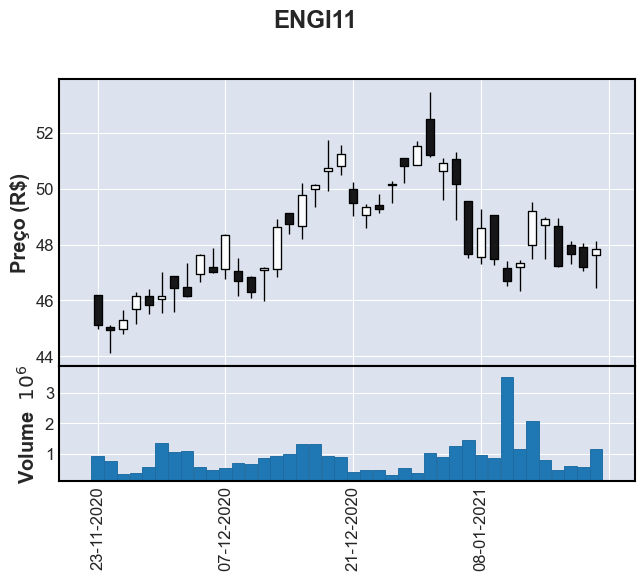

## 


## Harami de topo


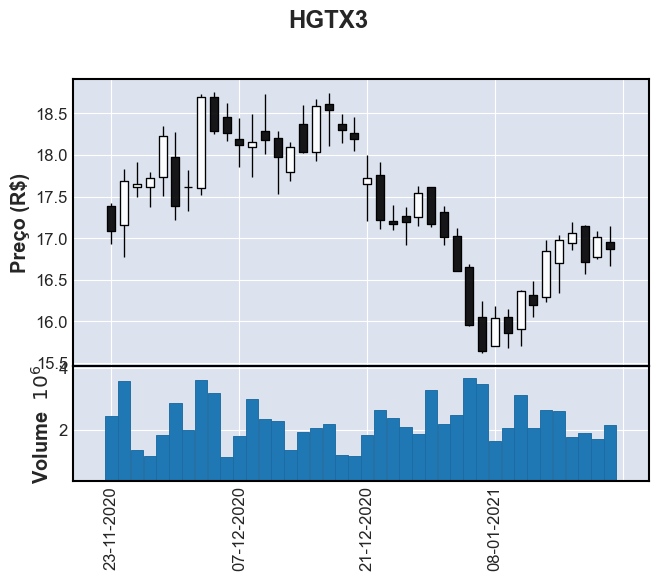

## 


## Hanging man


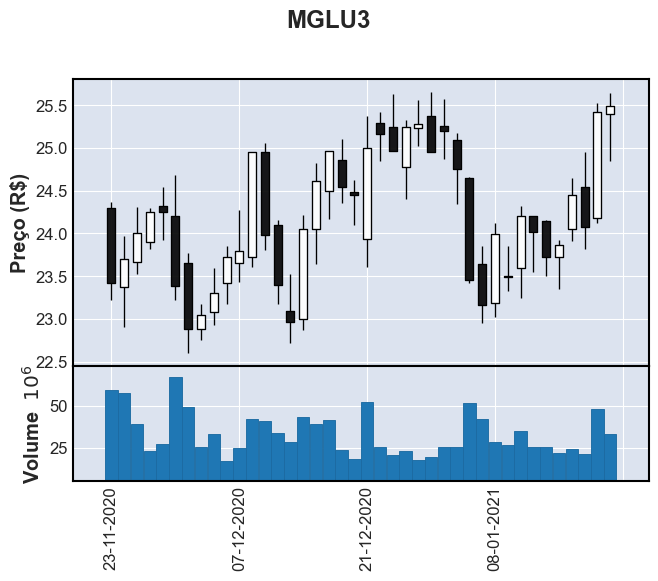

## 


## Dragonfly doji


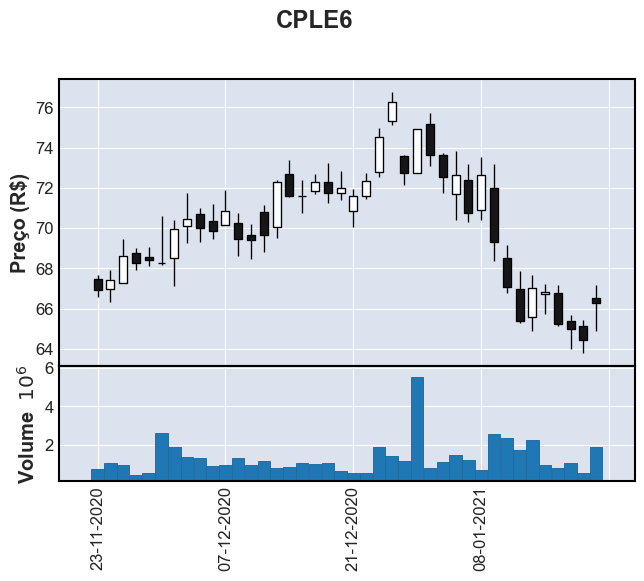

## 


## Engolfo de baixa


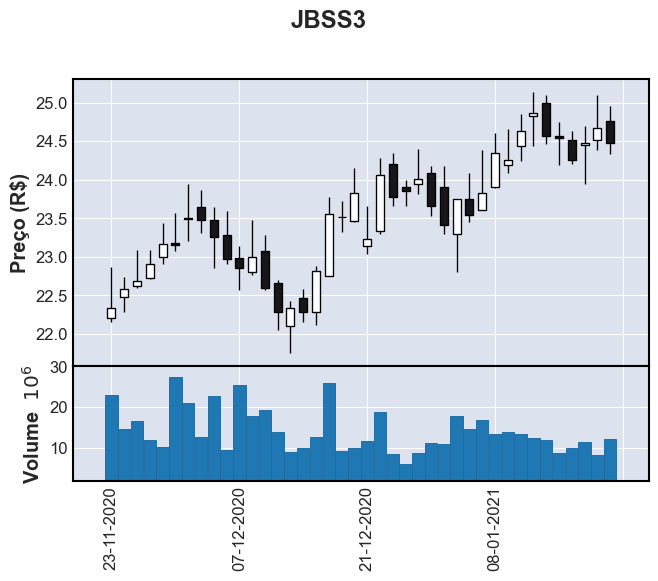

## 


## Shooting star


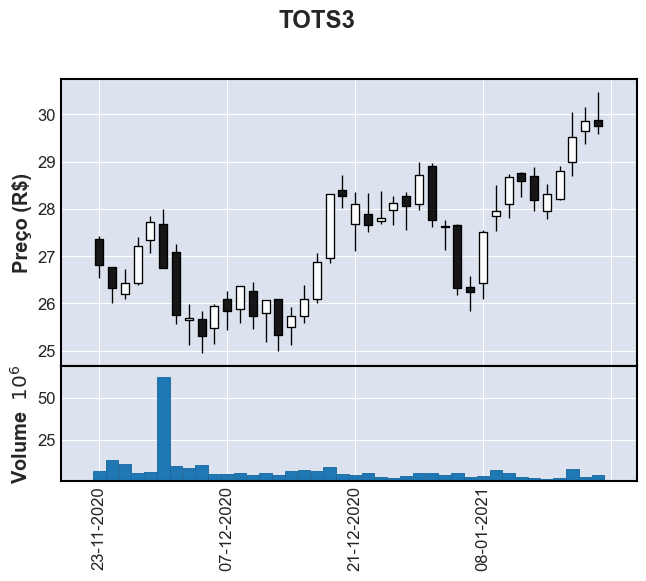

In [4]:
import pandas
import yfinance as yf
import mplfinance as mpf
import re
from datetime import datetime, timedelta
from IPython.display import display, Markdown
from pathlib import Path

data_folder = Path("../txt_files/")
file_to_open = data_folder / "radar-candles-21-01-2021.txt"
read_txt = open(file_to_open)
text = read_txt.read()

tickers = re.findall(r"[A-Z]{4}[0-9]+", text)

read_txt.close()

tickers_yf = []
for i in tickers:
    tickers_yf.append(i+'.SA')

date_two_months_ago = ( datetime.today() - timedelta(days=60) ).strftime('%Y-%m-%d')
prices = yf.download(tickers_yf, start=date_two_months_ago, end='2021-01-22', group_by='ticker', progress=False)

read_txt = open(file_to_open)
lines = read_txt.readlines()

for line in lines[4:]:
    if re.search(r"[A-Z]{4}[0-9]+", line):
        ticker = re.search(r"[A-Z]{4}[0-9]+", line).group(0)
        mpf.plot(prices[ticker+'.SA'], type='candle', title=ticker, ylabel='Preço (R$)', volume=True, datetime_format='%d-%m-%Y', xrotation=90)
    else:
        display(Markdown(f"## {line}"))

read_txt.close()